In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.color_palette("pastel")
sns.set_palette("pastel")

import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
import itertools



In [2]:
df = pd.read_csv("fraud.csv")
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,21/06/2020 12:15,3.040770e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,13/10/1991,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,21/06/2020 12:15,2.131810e+14,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",15/01/1951,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,21/06/2020 12:15,3.589290e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",05/03/1972,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,21/06/2020 12:16,3.596360e+15,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,27/05/1973,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,21/06/2020 12:16,3.546900e+15,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,30/05/1956,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [3]:
df.shape


(555719, 23)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
df['is_fraud'].value_counts()


is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [6]:
df['job'].value_counts()


job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [7]:
df['merchant'].value_counts()


merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

In [8]:
df.nunique()


Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

# Data cleaning

In [9]:
# Check duplicate

print(len(df[df.duplicated()]))

0


In [10]:
# Check for null values

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# rename the column

df.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [12]:
df['merchant'] = df['merchant'].str.replace("fraud_", "")


In [13]:
# Split trans_date_trans_time

df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)
df.head(5)

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,21/06/2020 12:14,2.291160e+15,Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,21/06/2020,12:14
1,1,21/06/2020 12:14,3.573030e+15,Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,21/06/2020,12:14
2,2,21/06/2020 12:14,3.598220e+15,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,21/06/2020,12:14
3,3,21/06/2020 12:15,3.591920e+15,Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,21/06/2020,12:15
4,4,21/06/2020 12:15,3.526830e+15,Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,21/06/2020,12:15


In [14]:
#  Conver to date 

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_time'] = pd.to_datetime(df['trans_time'], format= '%H:%M').dt.time
df['trans_month'] = df['trans_date'].dt.to_period('M').astype("str")
df['trans_dayOfWeek'] = df['trans_date'].dt.day_name()

In [15]:
#calculate age

df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (2020  - df['dob'].dt.year)

In [16]:
df['age'].unique()

array([52, 30, 50, 33, 65, 29, 69, 48, 47, 64, 24, 44, 43, 83, 49, 32, 28,
       23, 35, 63, 72, 90, 46, 56, 62, 25, 40, 51, 45, 59, 77, 41, 34, 26,
       91, 86, 27, 21, 38, 22, 36, 42, 31, 53, 20, 71, 82, 54, 55, 75, 37,
       16, 68, 39, 70, 17, 66, 60, 79, 58, 74, 67, 96, 57, 19, 61, 94, 73,
       84, 85, 81, 78, 15, 76, 89, 93, 80, 92, 87, 88, 18])

In [17]:
print("Min age", df['age'].min())
print("Max age", df['age'].max())

Min age 15
Max age 96


In [18]:
def apply_age_group(age):
    if(age <= 18):
        return 'Teenager'
    elif (age <= 25):
        return "Young Adult"
    elif (age <= 64):
        return "Adult"
    else:
        return "Elder"

In [19]:
df['age_group'] = df['age'].apply(apply_age_group)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [21]:
# Droping unnecessary columns

df = df.drop(['cc_num', 'street', 'zip', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long','first','last','dob'], axis=1)

In [22]:
df.sample(5)

,id,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,job,is_fraud,trans_date,trans_time,trans_month,trans_dayOfWeek,age,age_group
452197,452197,2020-12-08 17:46:00,Jakubowski Group,food_dining,31.56,M,Cedar,MI,44.8605,-85.8138,"Social research officer, government",0,2020-12-08,17:46:00,2020-12,Tuesday,45,Adult
470334,470334,2020-12-13 12:36:00,"Lubowitz, Terry and Stracke",personal_care,71.14,F,Marathon,TX,30.1886,-103.2214,Lexicographer,0,2020-12-13,12:36:00,2020-12,Sunday,30,Adult
472575,472575,2020-12-13 20:52:00,Bode-Rempel,kids_pets,79.20,F,Darien,GA,31.3826,-81.4312,Tax adviser,0,2020-12-13,20:52:00,2020-12,Sunday,53,Adult
463131,463131,2020-12-11 17:21:00,Bechtelar-Rippin,food_dining,50.03,F,Baton Rouge,LA,30.4066,-91.1468,"Designer, furniture",0,2020-12-11,17:21:00,2020-12,Friday,43,Adult
437817,437817,2020-12-06 09:40:00,"Connelly, Reichert and Fritsch",gas_transport,70.60,F,Esbon,KS,39.7562,-98.4462,Tourism officer,0,2020-12-06,09:40:00,2020-12,Sunday,33,Adult


In [23]:
df.shape

(555719, 18)

In [24]:
import datetime

def apply_time_group(time):
    hours = [i for i in range(0,24)]
    result = ''
    for hr in hours:
        if time >= datetime.time(hr,0,0) and time <= datetime.time(hr,59,0):
            result = result + str(hr) + "-" + str(hr+1) + "h"       
            if hr < 10:
                result = "0" + result
    return result


In [25]:
df['trans_time_group'] = df['trans_time'].apply(apply_time_group)


# Analysis

In [26]:
def annotate_bar(ax, custom_y_func, font_size = 14):
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(), 1))
        x = (p.get_x() + p.get_width() / 2) * 0.99
        y = ((p.get_y() + p.get_height() / 2) * 0.99)
        
        y = custom_y_func(y)
        ax.annotate(
            value,
            (x,y),
            color="black",
            size= font_size, ha='center', va='center'
        )

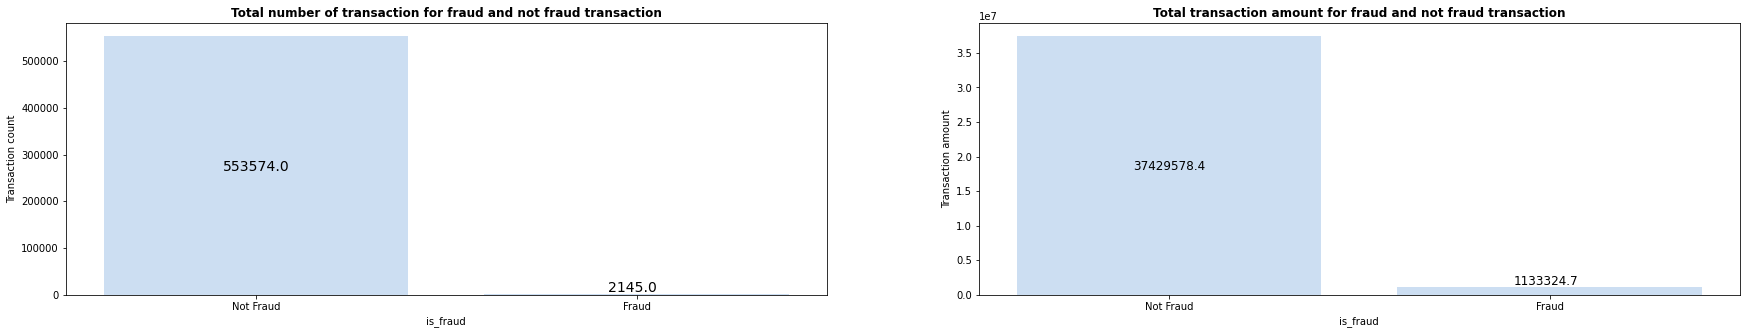

In [27]:
fig = plt.figure(figsize=(30, 5))

plt.subplot(1,2,1)
df_fraud_count = df['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud').value_counts().reset_index()
ax = sns.barplot(data = df_fraud_count, x = 'is_fraud', y='count', color='#c6def8')

#ax = df_fraud_count.plot(kind="bar", figsize=(15,5), title='Number of fraud and not fraud transaction')

# because no of fraud case to too small we set y to a fixed value to display in the chart


annotate_bar(ax, lambda y: 15000 if y < 10000 else y, font_size = 14,)
plt.title('Total number of transaction for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

df_fraud_amount = df.groupby('is_fraud')['amt'].sum().reset_index()

plt.subplot(1,2,2)
ax = sns.barplot(data = df_fraud_amount, x = 'is_fraud', y='amt', color='#c6def8')
annotate_bar(ax, lambda y: 1900000 if y < 1200000 else y, font_size = 12)

plt.title('Total transaction amount for fraud and not fraud transaction',fontsize=12,fontweight='bold')
plt.ylabel("Transaction amount")
ax.set_xticklabels(['Not Fraud','Fraud'], rotation = 0)
plt.show()

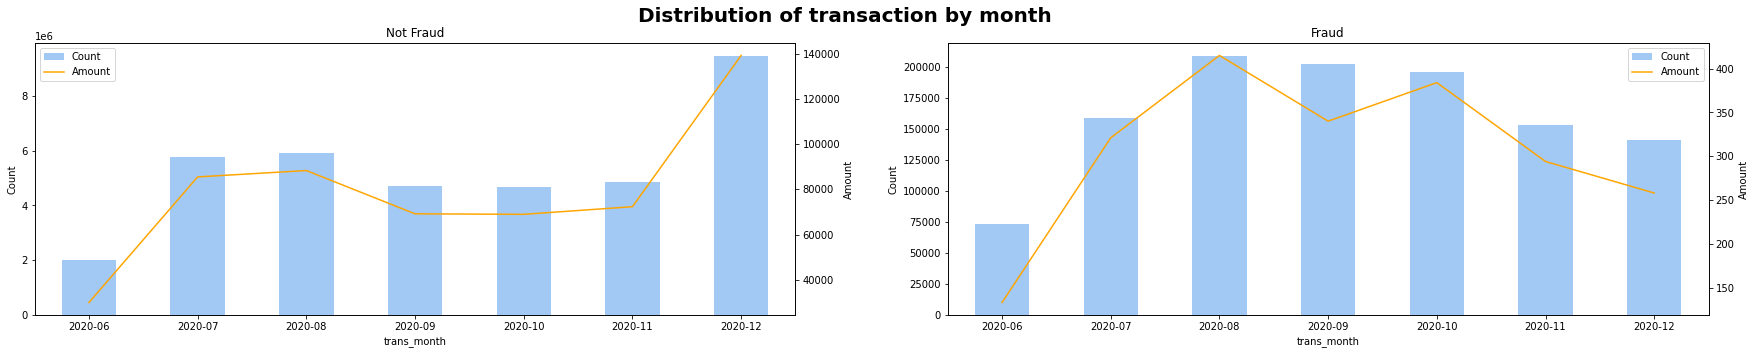

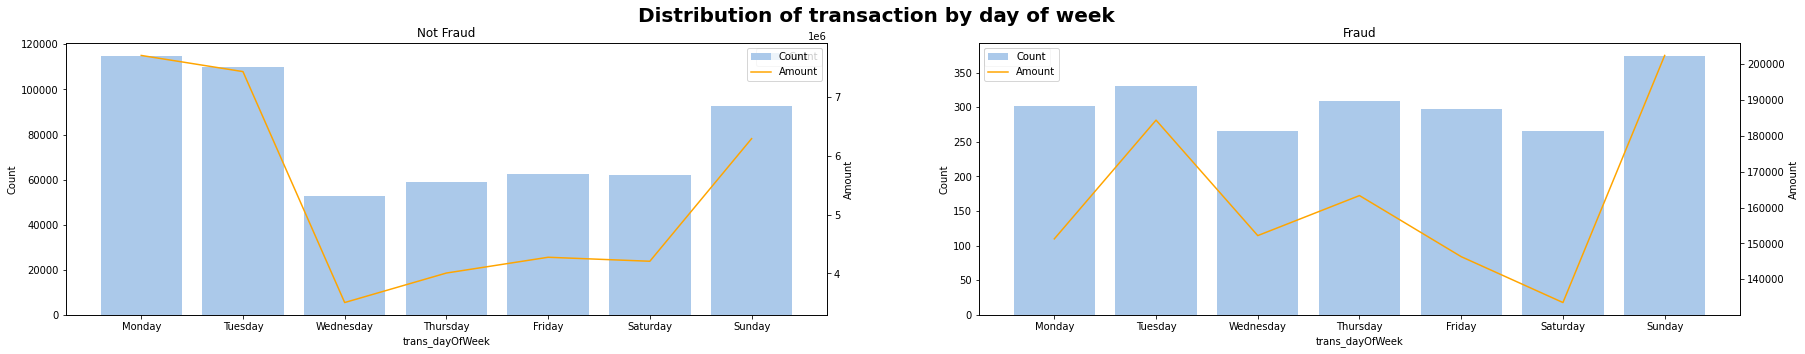

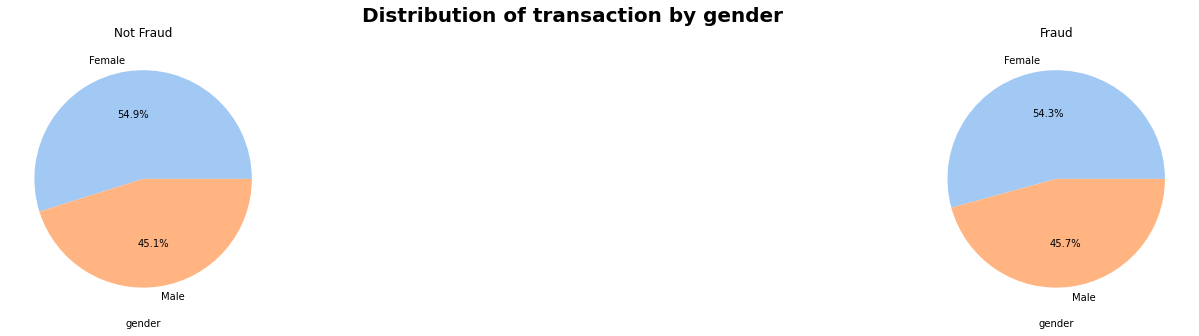

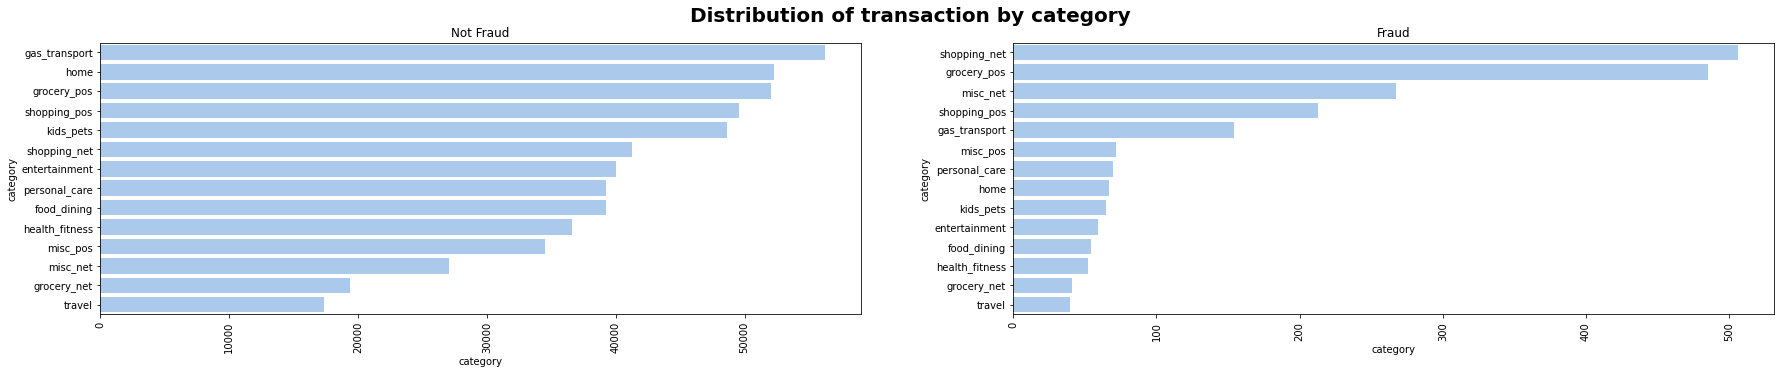

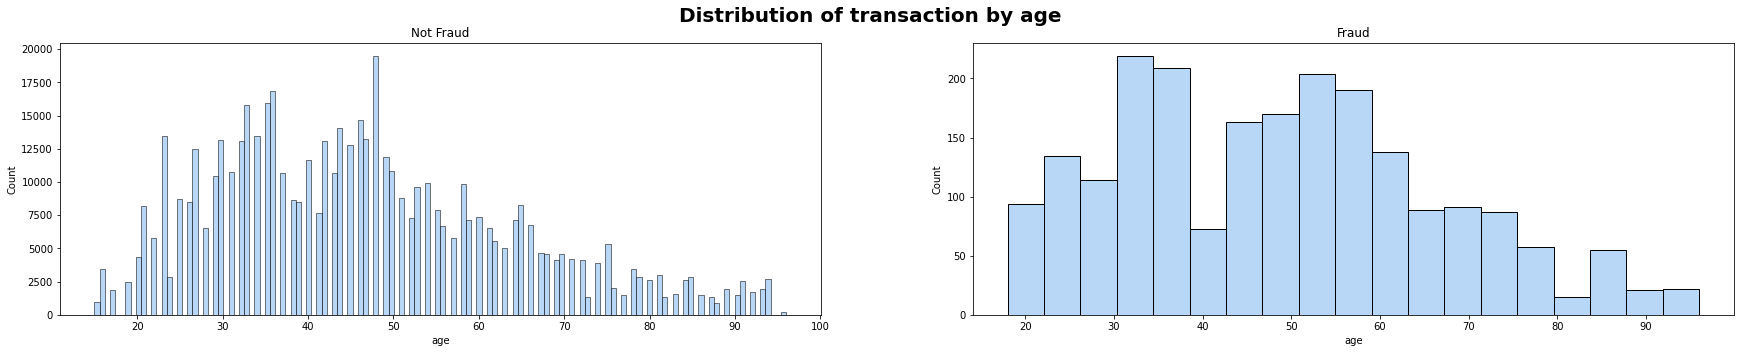

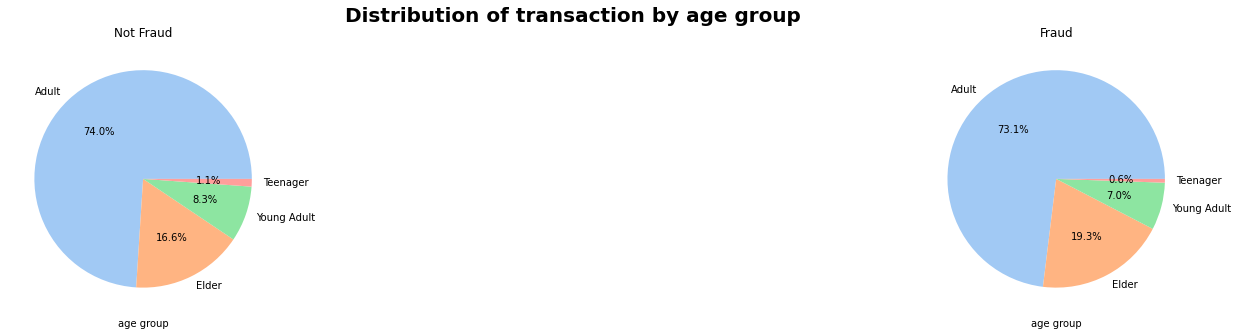

In [28]:
# ploting the overview of dataset by month, gender and category

columns = ['trans_month','trans_dayOfWeek','gender','category','age','age_group']
columns_name = ['month','day of week','gender','category','age','age group']
name = ['Not Fraud','Fraud']

df['fraud'] = df['is_fraud'].apply(lambda x: "Fraud" if x == 1 else 'Not Fraud')

index = 0
for col in columns:
    fig = plt.figure(figsize=(30, 5))
    plt.suptitle("Distribution of transaction by " + columns_name[index],fontsize=20,fontweight='bold')
    
    for i in range(0,2):
        plt.subplot(1,2,1+i)
        df_1 = df[df['is_fraud'] == i]
        if (col == 'trans_month'):
            ax = df_1.groupby(col)['amt'].sum().plot(kind='bar',label='Count')
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax.set_ylabel('Count')
            
            plt.twinx()
            ax1 = df_1.groupby(col).size().plot(kind='line',color='orange', label='Amount')
            ax1.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax1.set_ylabel('Amount')   
            
            chart, labels = ax.get_legend_handles_labels()
            chart1, labels1 = ax1.get_legend_handles_labels()
            ax1.legend(chart + chart1, labels + labels1, loc=0)
        elif (col == 'gender'):
            ax = plt.pie(df_1[col].value_counts(), labels = ['Female','Male'] , autopct='%1.1f%%')
        elif (col == 'age_group'):
            ax = plt.pie(df_1[col].value_counts(), labels = df_1[col].value_counts().index , autopct='%1.1f%%')
        elif (col == 'trans_dayOfWeek'):
            cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            ax = sns.barplot(data = df_1.groupby(col).size().reset_index(), x = col, y=0, label = 'Count'
                            , color='#a1c9f4', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
            ax.set_ylabel('Count')
            
            plt.twinx()
            
            ax1 = sns.lineplot(data = df_1.groupby(col)['amt'].sum().reindex(cats).reset_index(), x = col, y='amt', label ='Amount'
                            , color='orange')
            ax1.set_ylabel('Amount')
            
            chart, labels = ax.get_legend_handles_labels()
            chart1, labels1 = ax1.get_legend_handles_labels()
            ax1.legend(chart + chart1, labels + labels1, loc=0)
        elif (col == 'category'):
            ax = sns.countplot(data=df_1, y=col, order = df_1[col].value_counts().index)
        else:
            ax = sns.histplot(data=df_1, x=col)
        plt.title(name[i])
        plt.xlabel(columns_name[index])
    
        if col == 'category':
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    index +=1
    plt.show()

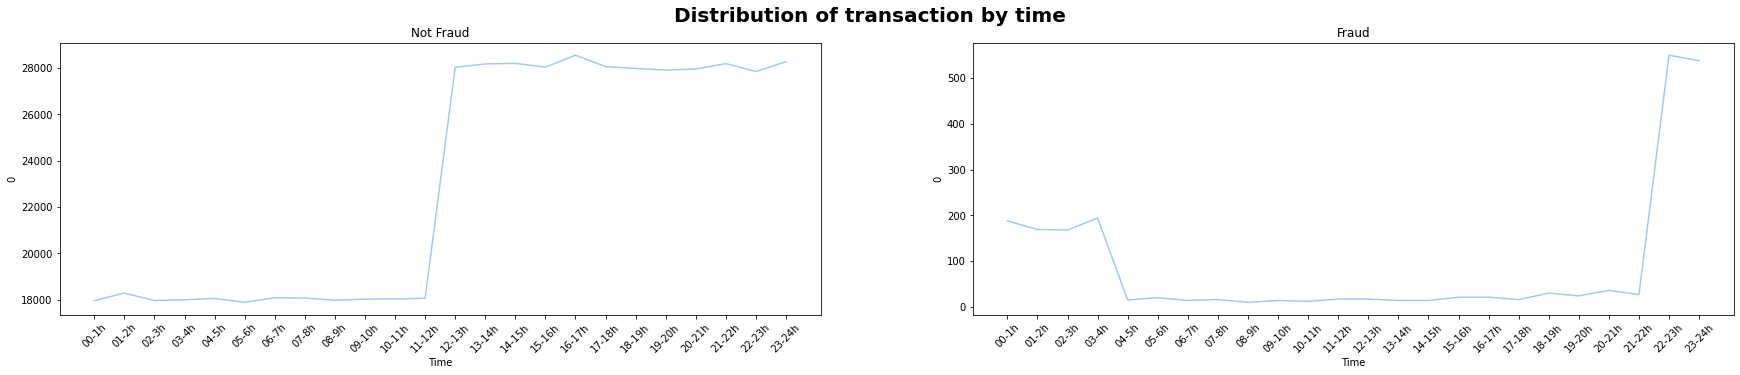

In [29]:
name = ['Not Fraud','Fraud']

fig = plt.figure(figsize=(30, 5))
plt.suptitle("Distribution of transaction by time",fontsize=20,fontweight='bold')
for i in range(0,2):
    plt.subplot(1,2,1+i)
    temp = df[df['is_fraud'] == i].groupby('trans_time_group').size().reset_index().sort_values(by='trans_time_group')
    ax = sns.lineplot(data=temp, x="trans_time_group", y=0)
    plt.title(name[i])
    plt.xlabel('Time')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

In [30]:
df[df['age'] >= 80]['is_fraud'].value_counts()


is_fraud
0    30273
1      113
Name: count, dtype: int64

In [31]:
df_over80 = df[(df['age'] >= 80) & (df['is_fraud'] == 0)].sort_values(by="trans_time", ascending=False)
df_over80

,id,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,job,is_fraud,trans_date,trans_time,trans_month,trans_dayOfWeek,age,age_group,trans_time_group,fraud
549313,549313,2020-12-29 23:59:00,Heller PLC,health_fitness,131.07,M,Scarborough,ME,43.5835,-70.3457,Make,0,2020-12-29,23:59:00,2020-12,Tuesday,87,Elder,23-24h,Not Fraud
161201,161201,2020-08-16 23:59:00,Leannon-Ward,food_dining,23.44,F,Naples,FL,26.1184,-81.7361,"Pilot, airline",0,2020-08-16,23:59:00,2020-08,Sunday,86,Elder,23-24h,Not Fraud
105871,105871,2020-07-27 23:59:00,"Hyatt, Russel and Gleichner",health_fitness,65.59,F,Marietta,SC,35.0296,-82.5136,Museum/gallery exhibitions officer,0,2020-07-27,23:59:00,2020-07,Monday,86,Elder,23-24h,Not Fraud
473429,473429,2020-12-13 23:59:00,"Wuckert, Wintheiser and Friesen",home,4.29,F,Surrency,GA,31.6489,-82.1982,"Engineer, technical sales",0,2020-12-13,23:59:00,2020-12,Sunday,94,Elder,23-24h,Not Fraud
473434,473434,2020-12-13 23:59:00,Altenwerth-Kilback,home,5.03,F,Ash Flat,AR,36.2201,-91.6421,Hydrologist,0,2020-12-13,23:59:00,2020-12,Sunday,94,Elder,23-24h,Not Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479838,479838,2020-12-15 00:00:00,"Goyette, Howell and Collier",shopping_pos,2.89,F,Allenhurst,NJ,40.2367,-74.0067,"Administrator, charities/voluntary organisations",0,2020-12-15,00:00:00,2020-12,Tuesday,85,Elder,00-1h,Not Fraud
170872,170872,2020-08-20 00:00:00,Kutch and Sons,grocery_pos,141.37,F,River,KY,37.8795,-82.7251,Quarry manager,0,2020-08-20,00:00:00,2020-08,Thursday,89,Elder,00-1h,Not Fraud
338150,338150,2020-10-29 00:00:00,Volkman Ltd,misc_net,101.76,M,Rock Tavern,NY,41.4575,-74.1659,Building surveyor,0,2020-10-29,00:00:00,2020-10,Thursday,83,Elder,00-1h,Not Fraud
192656,192656,2020-08-28 00:00:00,"Daugherty, Pouros and Beahan",shopping_pos,5.28,F,Wichita,KS,37.6223,-97.3136,Textile designer,0,2020-08-28,00:00:00,2020-08,Friday,90,Elder,00-1h,Not Fraud


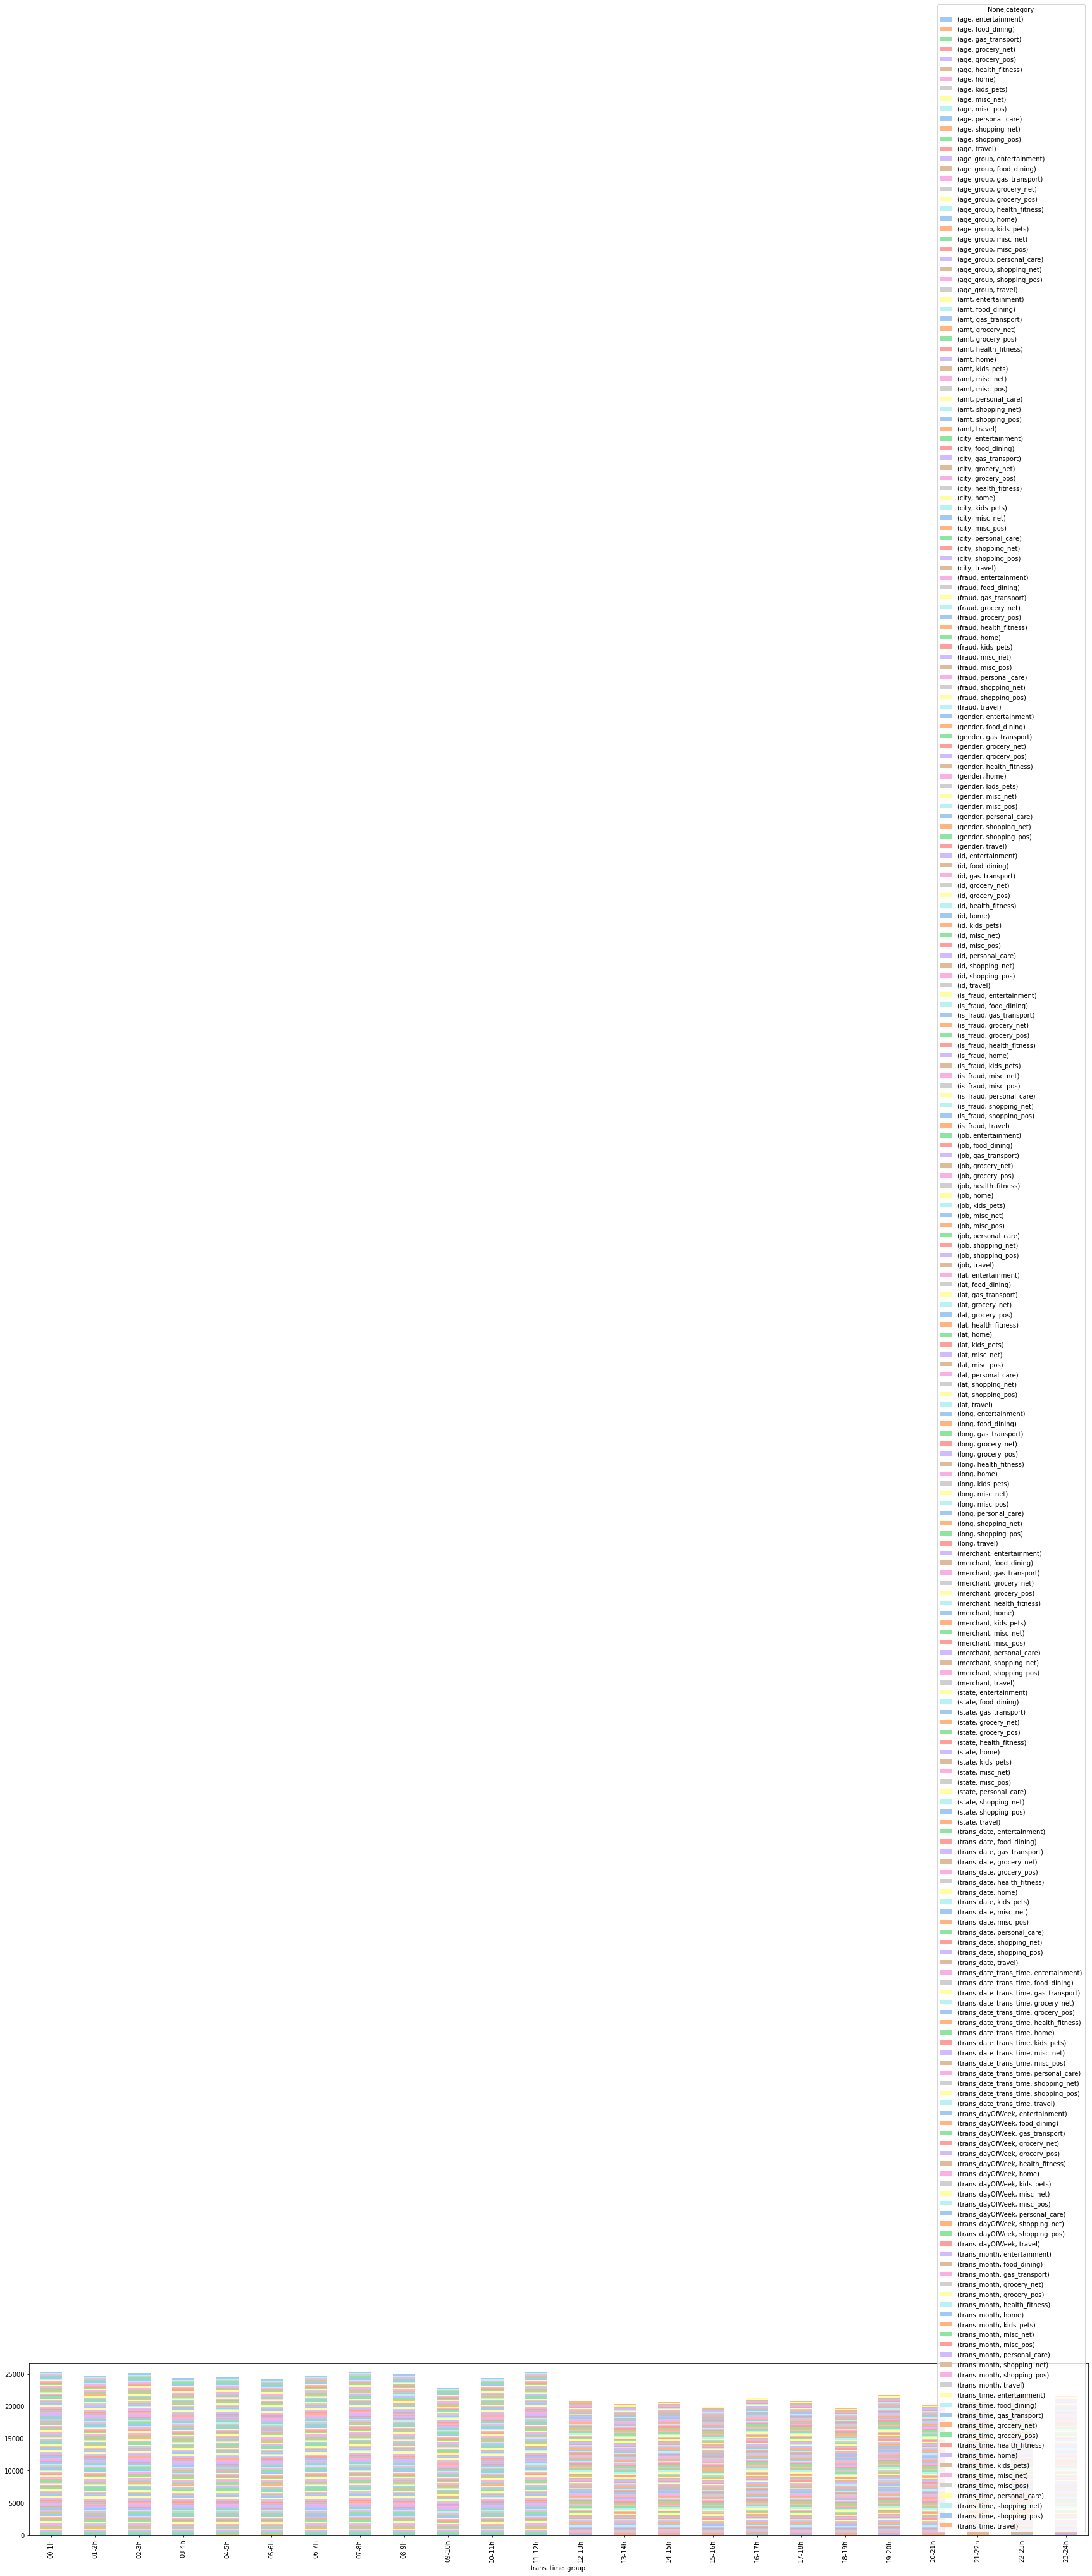

In [32]:
df_over80_category = df_over80.pivot_table(index="trans_time_group",columns="category",aggfunc='count').fillna(0)

# df_over80_category

df_over80_category.plot(kind='bar',stacked=True,figsize=(30, 5))
plt.show()


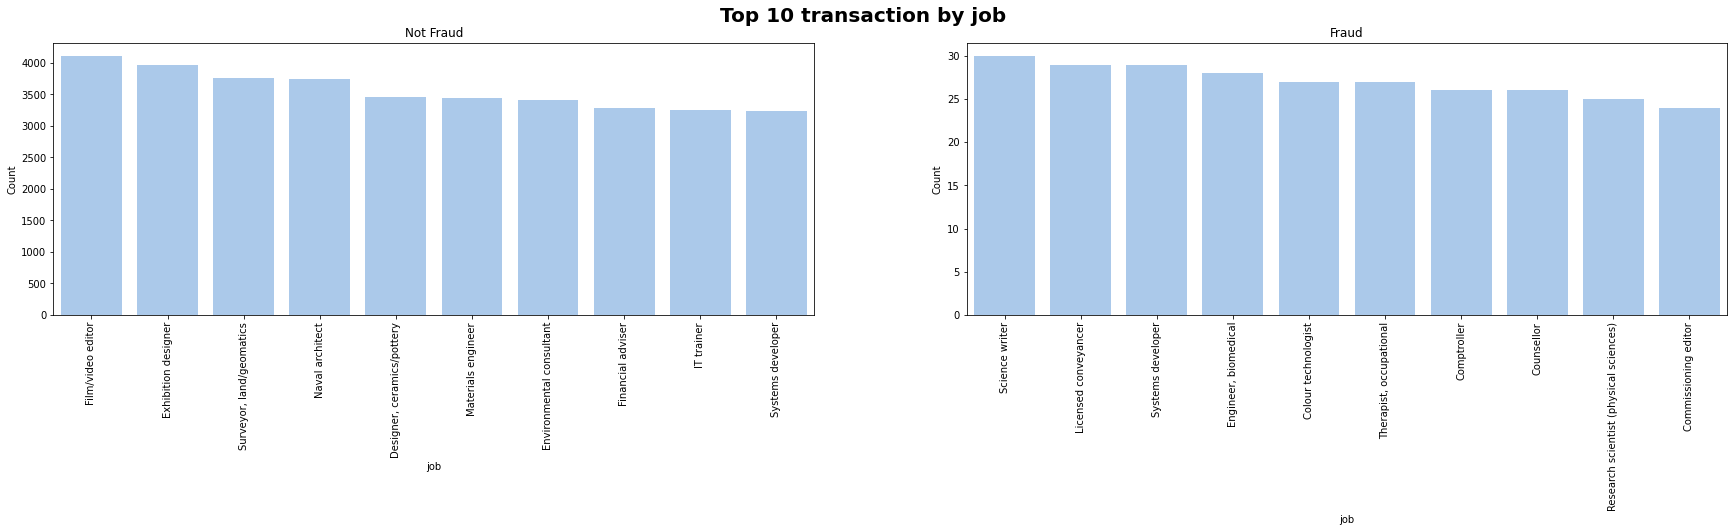

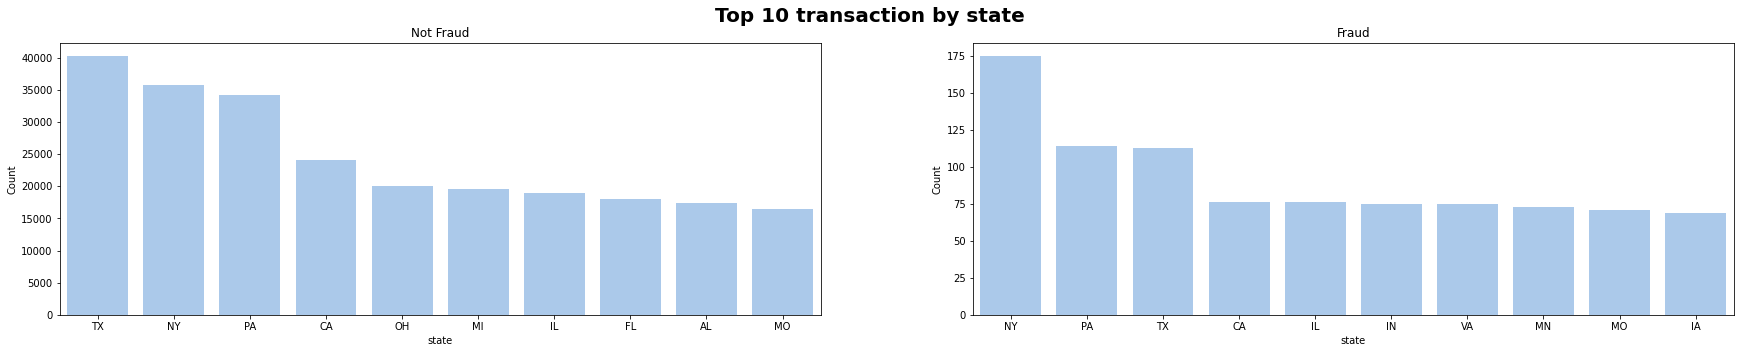

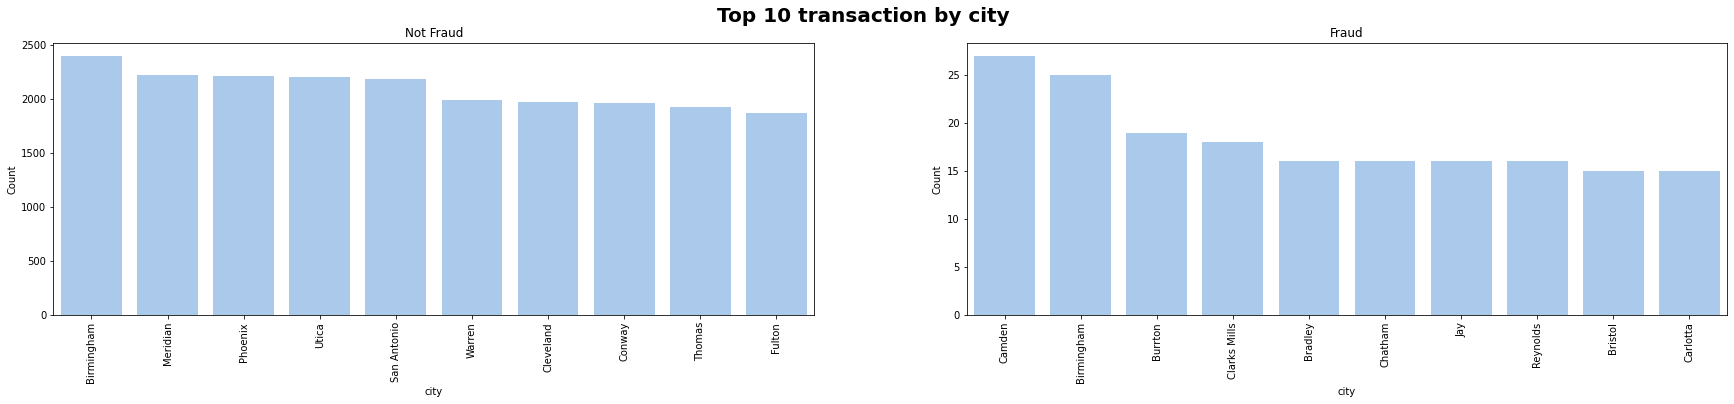

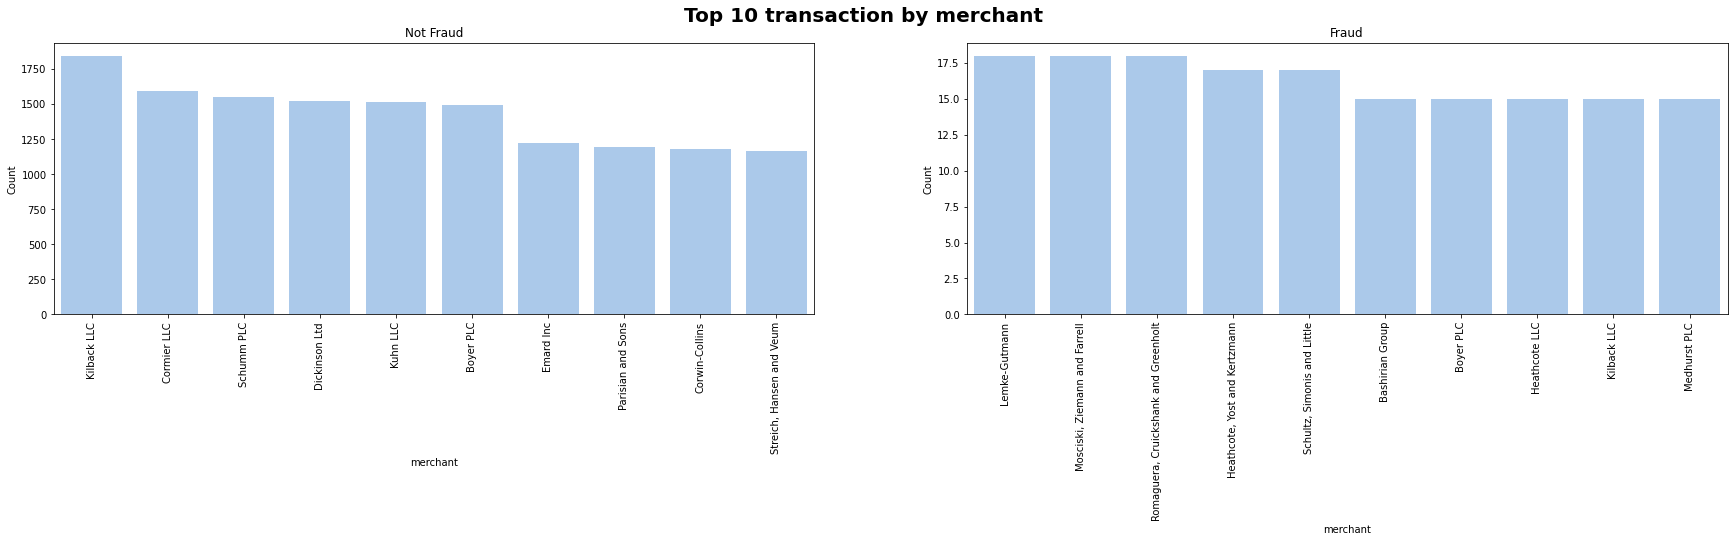

In [33]:
# By Transaction count

columns = ['job','state','city','merchant']
columns_name = ['job','state','city','merchant']
fraud = ['Not Fraud','Fraud']
y = 0 
for col in columns:
    sns.set_palette("pastel")
    name = columns_name[y]
    y += 1
    fig = plt.figure(figsize=(30, 5))
    if (col == 'trans_dayOfWeek'):
        plt.suptitle("Top transaction by " + name, fontsize=20,fontweight="bold")
    else:
        plt.suptitle("Top 10 transaction by " + name, fontsize=20,fontweight="bold")   
    for i in range(0,len(fraud)):
        temp_df = df[df['is_fraud'] == i]
        top = temp_df.groupby(col).size().nlargest(10)
        plt.subplot(1,2,1+i)
        ax = sns.barplot(data = top.reset_index(), x = col, y=0, color='#a1c9f4')
        if (col == 'state'):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        plt.ylabel('Count')
        plt.xlabel(name)
        #plt.axhline(temp_df.groupby(col).size().mean(), color='red', linestyle='--')
        plt.title(fraud[i])
    plt.show()

In [34]:
df_train = df.copy()
le = LabelEncoder()
for columns in df.columns:
    if df_train[columns].dtype == 'object':
        df_train[columns] = le.fit_transform(df_train[columns])

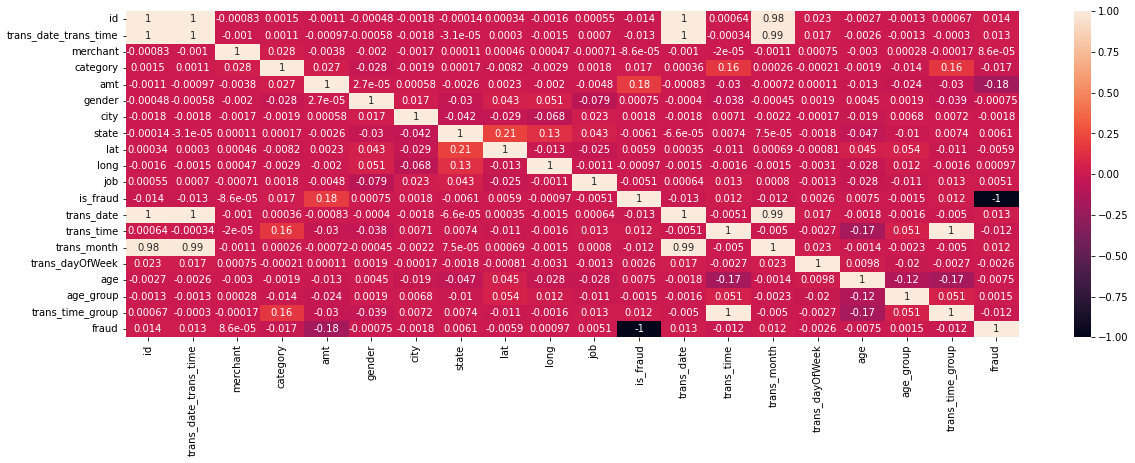

In [35]:
plt.figure(figsize=(20,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [42]:
# Select X an y

model_features = ["gender","job",'category',"merchant", "city", "state"]
target = ["is_fraud"]

# under/downsampling

negative = df_train.loc[df_train['is_fraud'] == 0].sample(10000)
positive = df_train.loc[df_train['is_fraud'] == 1]                          
df_train = pd.concat([positive, negative])

X = df_train[model_features]
y = df_train[target]

# Build model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Model training

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_clf = LogisticRegression()

logistic_clf.fit(X_train_scaled, y_train)


y_pred_logistic = logistic_clf.predict(X_test_scaled)


accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression:", accuracy_logistic)

Accuracy of Logistic Regression: 0.7033479692645445


In [48]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [49]:
logistic_clf = LogisticRegression()


logistic_clf.fit(X_train_resampled, y_train_resampled)


y_pred_logistic = logistic_clf.predict(X_test_scaled)

In [50]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      3003
           1       0.20      0.31      0.24       641

    accuracy                           0.66      3644
   macro avg       0.52      0.52      0.51      3644
weighted avg       0.72      0.66      0.68      3644



In [51]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = DT.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.14      0.25      3003
           1       0.19      0.93      0.31       641

    accuracy                           0.28      3644
   macro avg       0.55      0.54      0.28      3644
weighted avg       0.78      0.28      0.26      3644

